https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html - туториал, которым собственно всё ниже и вдохновлено

Scanpy - дополнительный пакет специально для обработки single-cell (sc), использующий для хранения данных свой формат - anndata - аннотированная матрица (по сути исходная матрица экспрессии генов, которую мы могли бы представить как pandas dataframe, только в неё по ходу анализа можно добавлять данные, которые нам дополнительно интересны, напр. митохондриальные гены или высоко экспрессирующиеся и т.д.)

In [ ]:
!pip3 install scanpy

     |████████████████████████████████| 2.0 MB 5.5 MB/s 
     |████████████████████████████████| 86 kB 4.8 MB/s 
     |████████████████████████████████| 91 kB 7.4 MB/s 
     |████████████████████████████████| 1.1 MB 38.2 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=8e36727890e1501d313a6d063bf03b88f49554315bdb7603b39600dcfa3d2e69
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=d94af1ccb41d4edf29f26000aef9b31aadf4f0405f05ddae7ff74351cc3a7aac
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=ce745375c92d461247e33c33593695d9d286cb9bd0cdeca14af2c5a77045c8e5
  Stored in directory: /root/.cache/pi

In [ ]:
import scanpy as sc

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Это sc данные для мнемиопсиса, по столбцам расположены клетки, по строкам - гены.

In [ ]:
adata = sc.read_csv('/content/drive/MyDrive/Colab Notebooks/GSM3021563_Mnemiopsis_leidyi_UMI_table.txt', delimiter='\t')


In [ ]:
pdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GSM3021563_Mnemiopsis_leidyi_UMI_table.txt', delimiter='\t')

In [ ]:
pdata.head()

,WASP0001001,WASP0001002,WASP0001003,WASP0001005,WASP0001006,WASP0001007,WASP0001009,WASP0001011,WASP0001012,WASP0001013,...,WASP0016364,WASP0016367,WASP0016369,WASP0016370,WASP0016373,WASP0016375,WASP0016380,WASP0016381,WASP0016383,WASP0016384
ML000110a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ML000112a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ML000113a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ML000114a,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ML000115a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ML000116a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ML000117a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ML000118a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ML000119a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ML00011a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Я не знаю, почему, но когда scanpy читает данные, он по строкам (n_obs - observations, n_vars - variables) располагает гены, а по столбцам клетки (pandas так же делает, на самом деле). Но по определению формат anndata это матрица размерности n_obs * n_vars, где по строкам должны располагаться клетки, а по столбцам гены (см. слайд 1 в презентации), что в данном случае логично, потому что гены это признаки, а клетки объекты. 

In [ ]:
adata


AnnData object with n_obs × n_vars = 19636 × 4803

Поэтому матрицу надо транспонировать и работать дальше уже с ней.

In [ ]:
adata=adata.T

In [ ]:
adata

AnnData object with n_obs × n_vars = 4803 × 19636

In [ ]:
# verbosity просто для того, чтобы после исполнения какой-нибудь фильтрации нулей, в выводе показали, сколько отфильтровалось
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, facecolor='white')

Не знаю, что можно включить в вывод, кроме самого важного - визуализации и кластеризации (это можно обсудить), но, если что, можно построить такой боксплот наиболее высоко экспрессирующихся генов. 

Вообще, конкретно в этих данных первый ген, судя по графику, какой-то подозрительно слишком высоко экспрессирующийся и его можно на шаге нормализации убрать (при визуализации он здесь автоматически нормализовал, но на самих данных это не отразилось, поэтому далее это нужно делать отдельно). 

##включить в отчет, логарифмировать шкалу, больше генов

normalizing counts per cell
    finished (0:00:00)


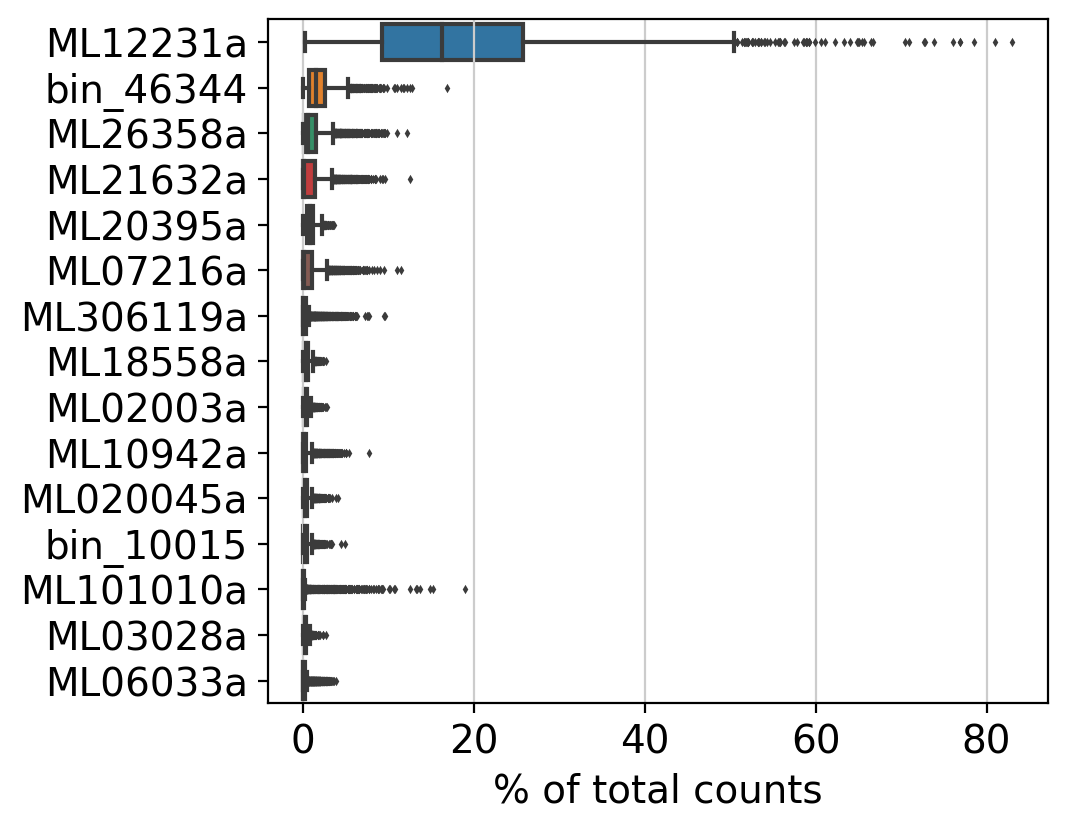

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=15)

Первые параметры, которые можно варьировать (на основе какого-то биологического знания или анализа того, насколько много исходных данных). 

##показывать параметры, сделать изменение параметров или варианты


In [ ]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=200)

filtered out 1838 cells that have less than 500 genes expressed
filtered out 15494 genes that are detected in less than 200 cells


Нормализация (простейший способ: для каждой клетки - строки - посчитали сумму по столбцам и на неё разделили значения в этой строке). target_sum отвечает за то, сколько будет прочтений на клетку (малые значения не очень хороши для алгоритмов, поэтому надо помножить на какую-нибудь степень). 

Вообще, у этой функции есть 2 хороших параметра (см. слайд 2): exclude_highly_expressed и max_fraction. Если в первом установить true, то гены, в которых экспрессия хотя бы в одной клетке больше, чем max_fraction, не будут учитываться при нормализации. Это важно, но max_fraction принимает значения только от 0 до 1, что странно, т.к. в данном случае я бы установила порог 1000 (тот странный ген сверху имеет максимальное значение порядка 10e3, а все остальные 10е2). Но не могу :( 

https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.normalize_total.html

In [ ]:
sc.pp.normalize_total(adata, target_sum = 1e4)

normalizing counts per cell
    finished (0:00:00)


In [ ]:
#необязательно, но если хотим выделить отдельно далее hihg_exprss_genes, то на вход нужны логарифмированные данные
sc.pp.log1p(adata)

Можно вычислить это, оно сохранится как отдельный столбец в наших данных, который потом по умолчанию используется для построения PCA, но последний можно построить и по всему пространству, так что здесь двояко. Параметров у highly_variable_genes много и можно найти здесь - https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.highly_variable_genes.html . Я в данном шаге использую по умолчанию. 

дисперсия от среднего, разделить гены на два списка

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


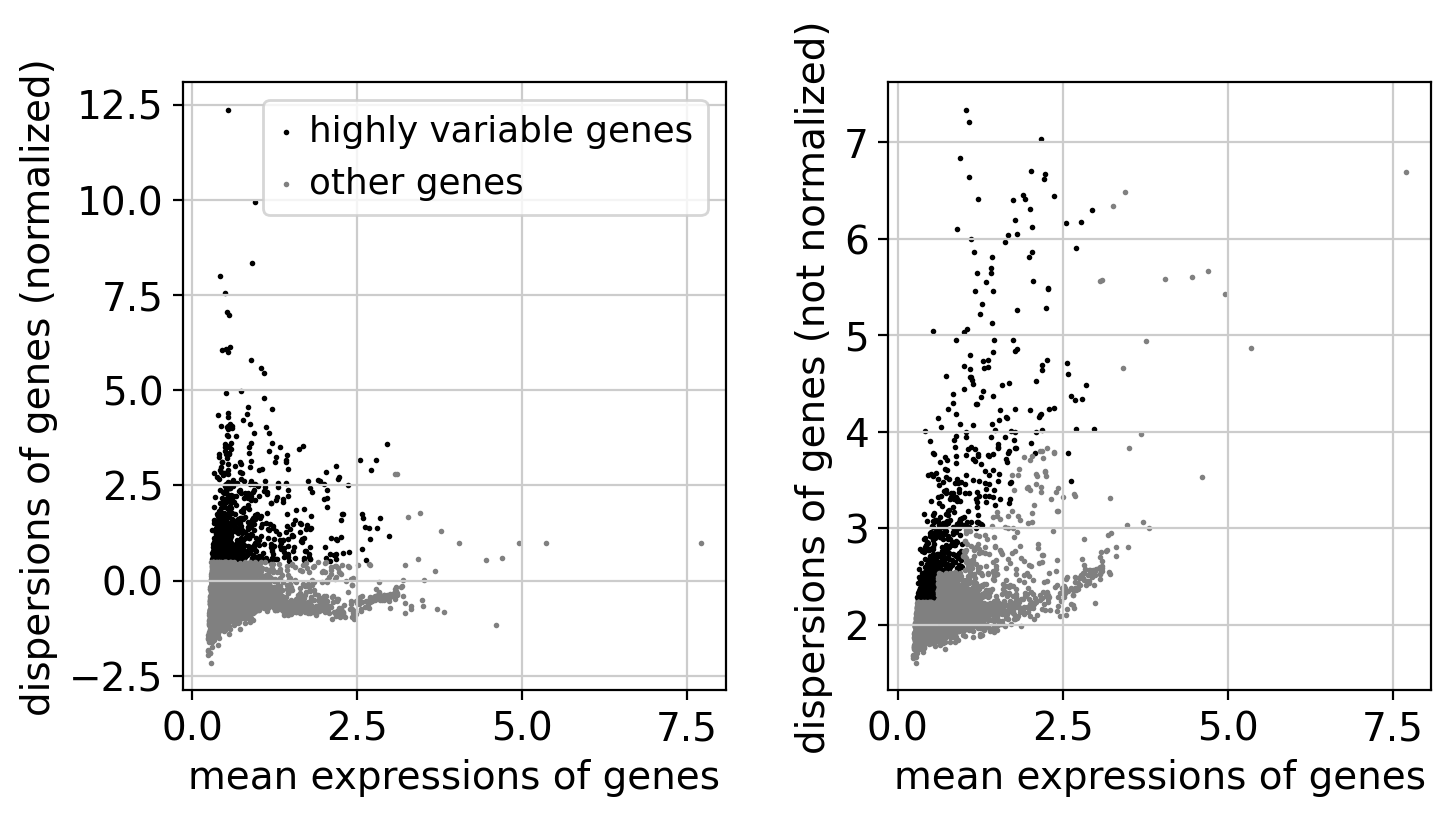

In [ ]:
sc.pp.highly_variable_genes(adata)
sc.pl.highly_variable_genes(adata)

https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.scale.html тоже использую всё по умолчанию

In [ ]:
sc.pp.scale(adata)

In [ ]:
#можно посмотреть, что теперь есть у нас из данных
adata

AnnData object with n_obs × n_vars = 2965 × 4142
    obs: 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [ ]:
((adata.var).highly_variable == True).sum()

804

https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.pca.html 

По умолчанию здесь исходное пространство, размерность которого хотим понизить, - пространство highly_variable_genes (его размерность 804, в принципе нормально и намного лучше, чем 20e3, которое было).

Также можем понизить размерность всего пространства, его размерность после всех преобразований выше = 4142. 

По умолчанию считается 50 первых компонент, но чтобы потом на графике оценить, как быстро падает процент описываемой дисперсии, можно посчитать побольше.

computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:00)


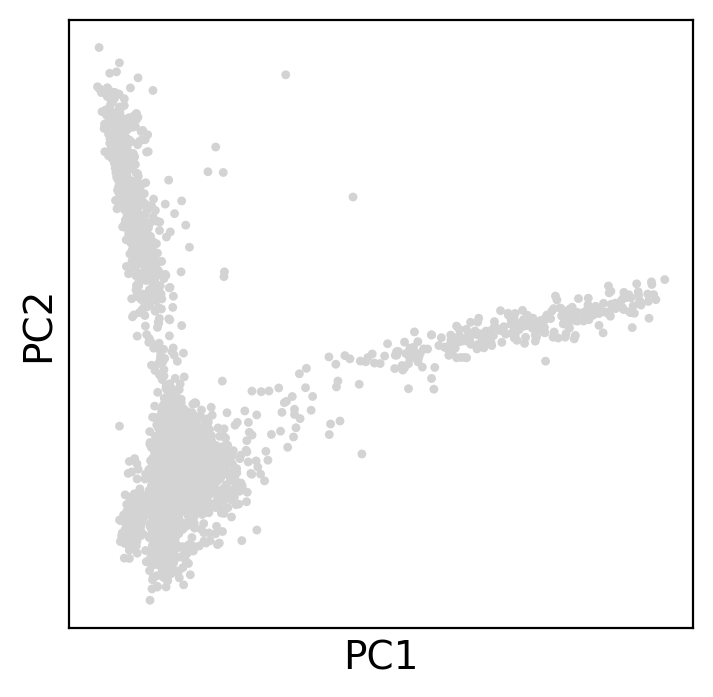

In [ ]:
sc.tl.pca(adata, n_comps = 100)
sc.pl.pca(adata)

На таком графике можно оценить, сколько главных компонент взять для последующего понижения размерности (какой длины хвост справа обрезать). 

##вывод с выбором количества компонент
##предложение оптимального количества (по уменьшению производной или как-то еще)

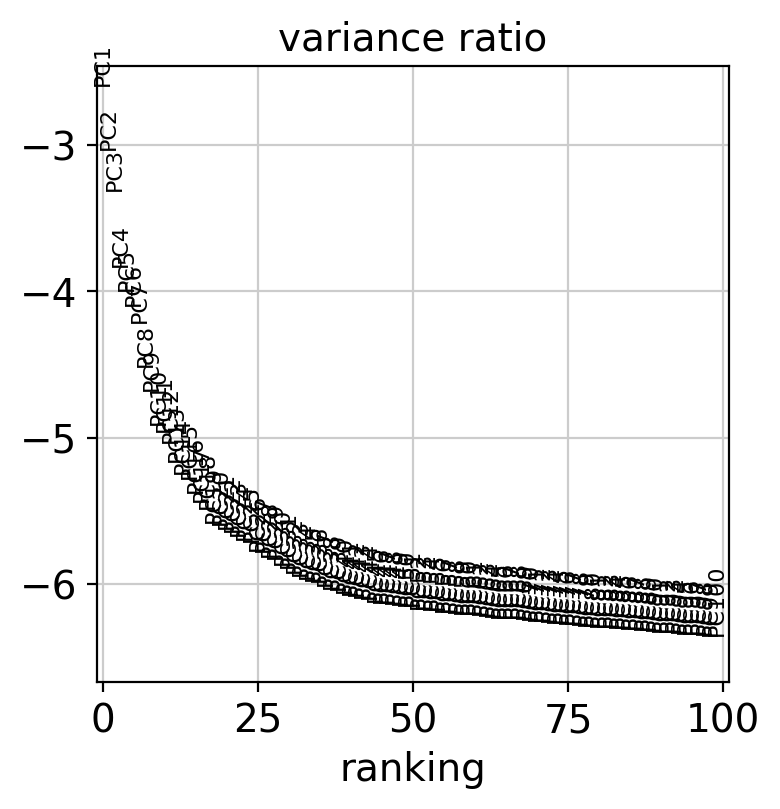

In [ ]:
sc.pl.pca_variance_ratio(adata, n_pcs=100, log=True)

На таком графике можно увидеть, какие гены вносят больший/меньший вклад в каждую из первых 3-х главных компонент.

##нужно, для всех выбранных, показывать выборочно

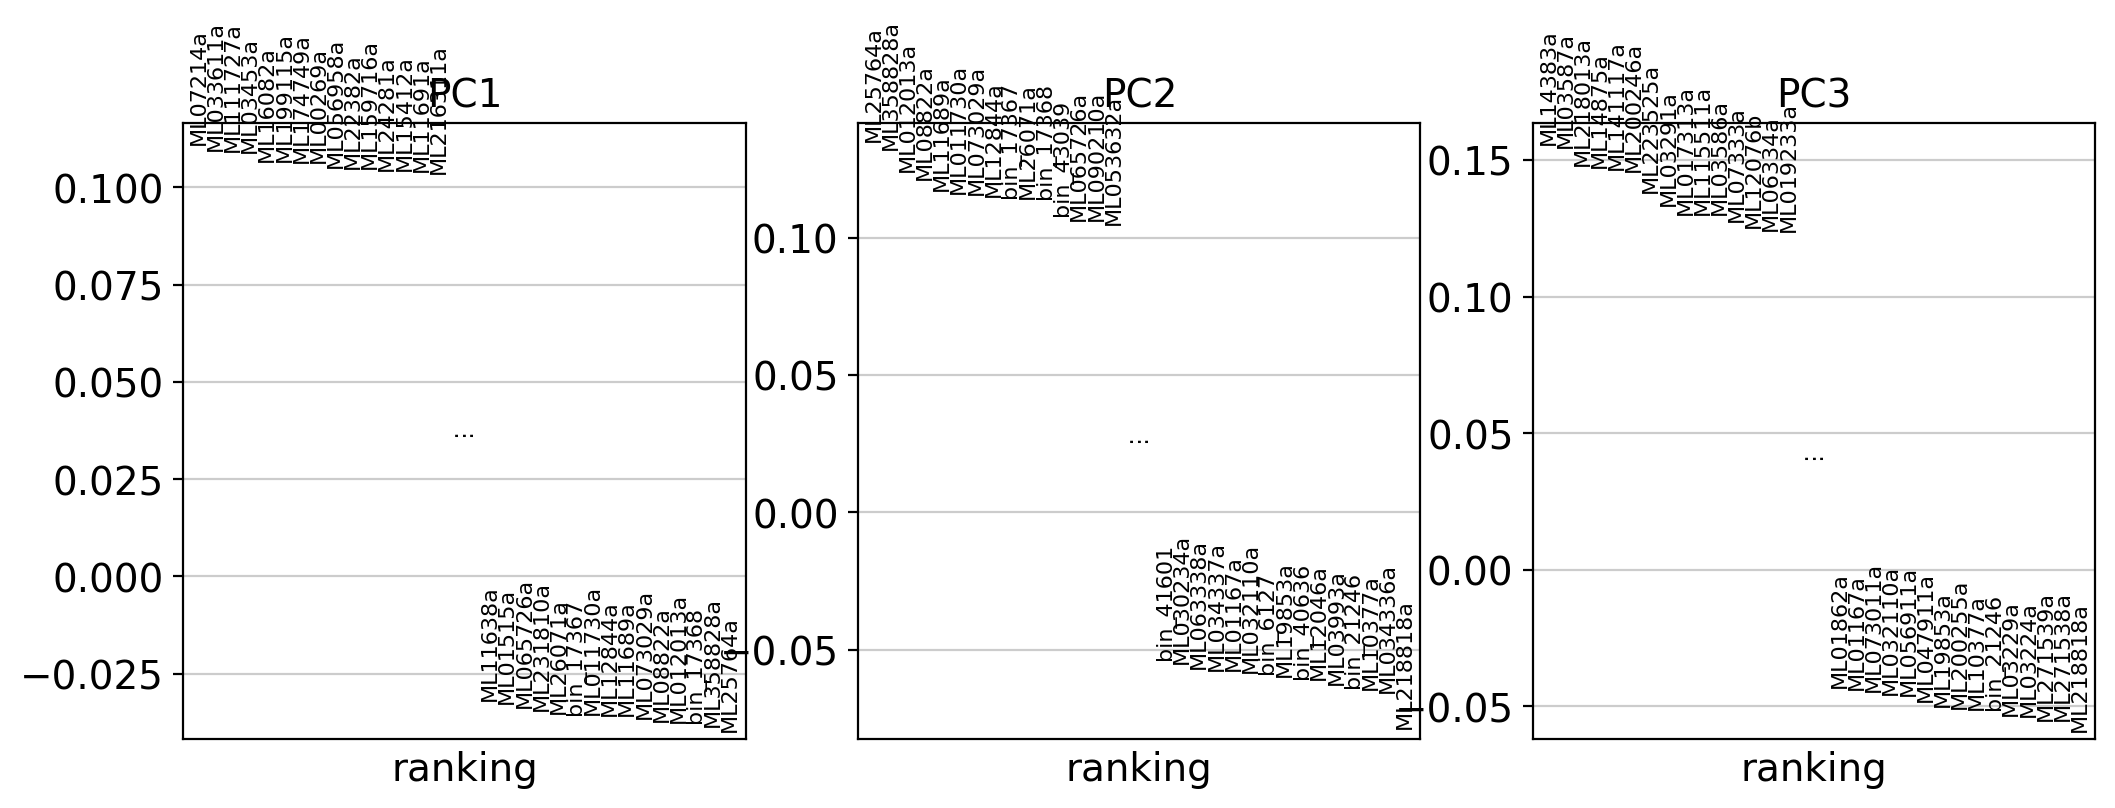

In [ ]:
sc.pl.pca_loadings(adata)

Можно раскрасить после этого в какие-нибудь гены, выбрав,например, из тех, которые вносят больший вклад в каждую компоненту

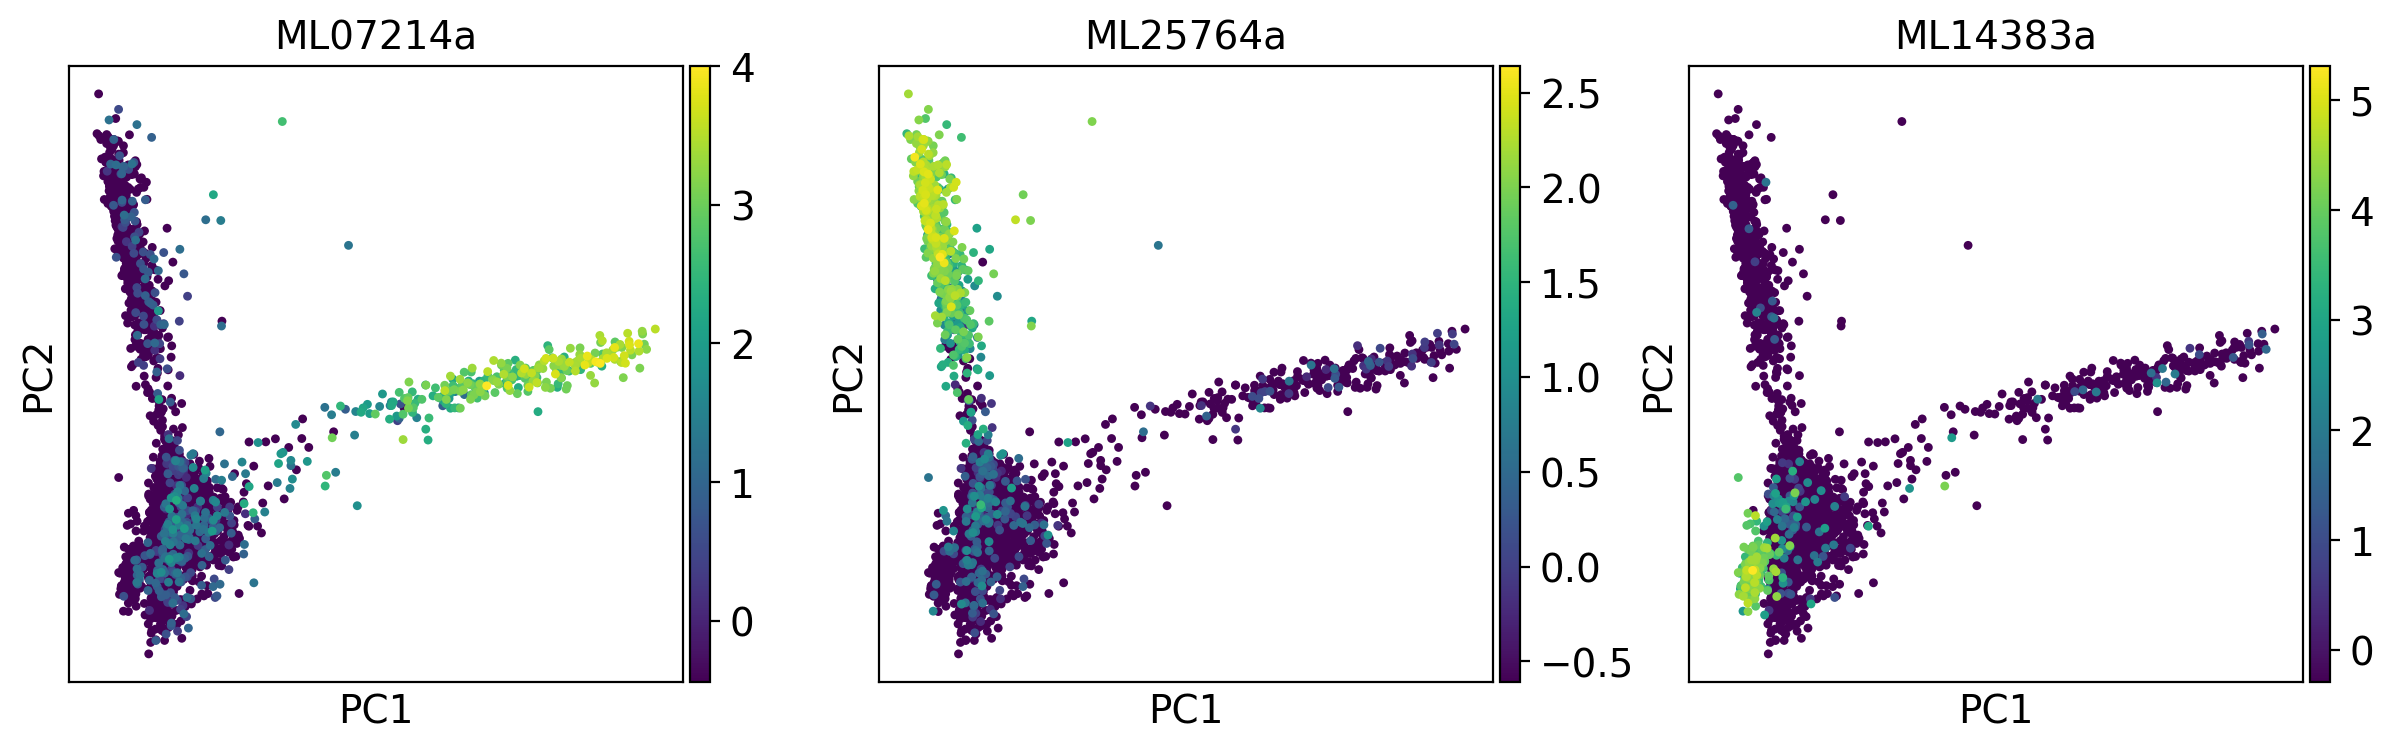

In [ ]:
sc.pl.pca(adata, color=['ML07214a','ML25764a','ML14383a'], ncols = 3, hspace = 0.1, wspace = 0.2)

## вывод предыдущих графиков совместно с этими, с выбором генов для подсветки (вывод инфы о компонентах парами)

In [ ]:
!pip3 install --upgrade matplotlib


     |████████████████████████████████| 11.2 MB 5.7 MB/s 
     |████████████████████████████████| 895 kB 50.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
sc.pl.pca(adata, color=['ML07214a','ML25764a','ML14383a'], ncols = 3, hspace = 20, wspace = 0.2, projection = '3d')

ImportError: ignored

Построение графа ближайших сосдей: ещё одни важные параметры для варьирования. Компоненты можно выбрать, на самом деле не наугад, а считая как-то производную (вот я пока не до конца разобралась, как, поэтому здесь они выбраны просто на глаз из графика выше). А соседей приходится варьировать (возможно, есть алгоритм оптимизации или критерий оптимального числа соседей, но я о нём не знаю).

In [ ]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:20)


In [ ]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


In [ ]:
!pip3 install leidenalg

     |████████████████████████████████| 1.4 MB 2.6 MB/s 
     |████████████████████████████████| 3.1 MB 12.8 MB/s 


running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


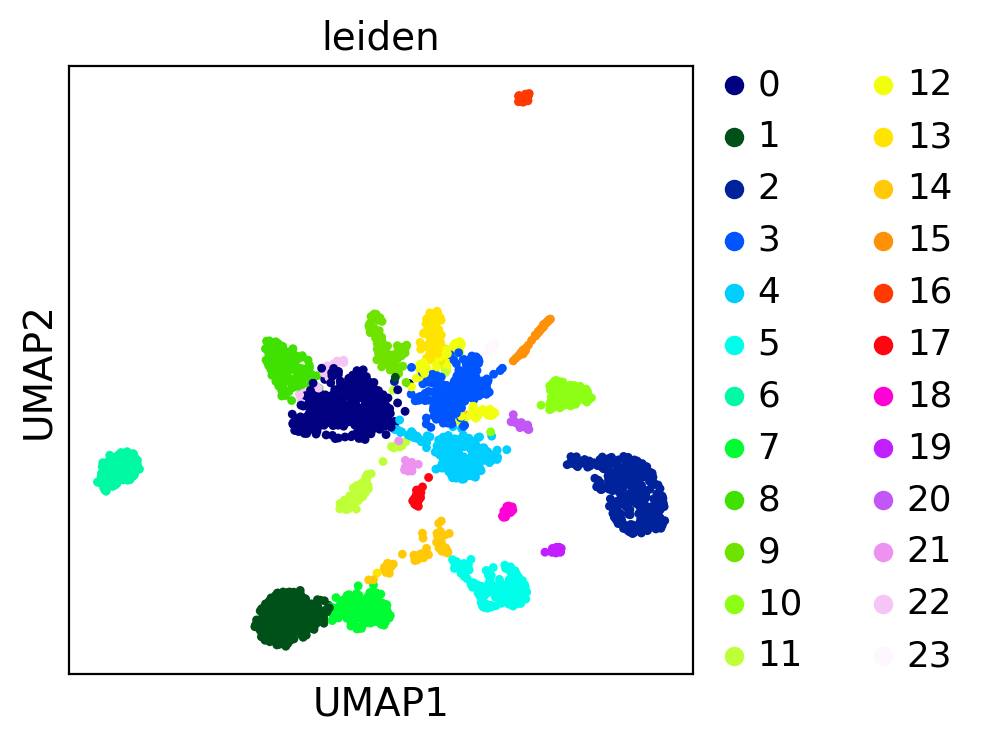

In [ ]:
sc.tl.leiden(adata)
sc.pl.umap(adata, color='leiden', palette = 'gist_ncar')

##1. подсветка экспрессии выбранных генов
##2. отдельный анализ выбранного кластера или нескольких кластеров вместе (петля в пайплайне)
##3. Экспорт списка клеток с номерами кластеров или добавить эту инфу к исходной таблице или к таблице с координатами клеток по компонентам (значениями компонент)

##Что *должно* быть в mvp:
1. вывод картинки с кластерами и таблички с кластерами как файла 
2. интерактивный вывод с инфой по компонентам отдельно (+)
3. Далее дополнение по сути только по гибкости вычисления, выбора клеток/генов

